In [1]:
import pandas as pd
import scanpy as sc
import numpy as np
import pickle as pkl
import seaborn as sns
import os
import statsmodels.api as sm
from scipy import stats

from lik_models import *
from helper_funcs import *
from plotting_funcs import *
from mcmc_data import *

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
mcmc = mcmc_data(count_matrix_fn='data/e14_5_mouse_forebrain_neuron_diff.raw_count_matrix.tsv',
                          pkl_dir='outputs/e14_5_forebrain_dorsal/',
                          tfs_fn='data/mouse_transcription_factors_zhou_et_al.txt',
                          name='e14.5 Mouse Cortical Neuron')

#load in all pkls
mcmc.load_pkls(sub_tfs=False)

#get best fitting genes
mcmc.get_top_genes(n_top=50,sub_tf=False)

Loading Count Matrix...
Normalizing Count Matrix...


In [3]:
gene_map = {}
gene_map_r = {}
for gene in mcmc.counts_dict:
    gene_map[gene.split("|")[1]] = gene
    gene_map_r[gene] = gene.split("|")[1]

In [4]:
gene = gene_map['Jun']

In [5]:
len(mcmc.dic_dict)

5

In [6]:
mcmc.best_fits[gene]

'double sigmoidal'

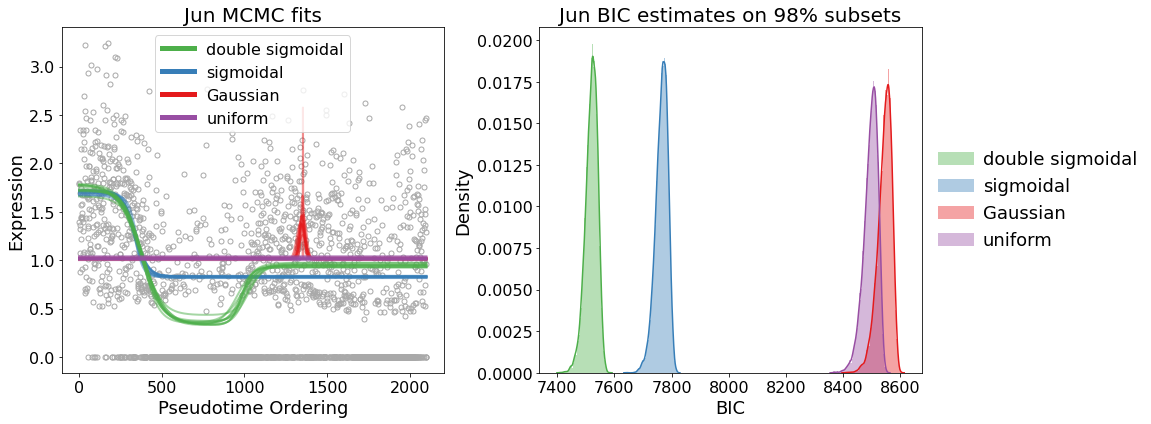

In [7]:
fig = make_joint_fit_and_bic_estimate_plot(mcmc,gene,gene_lab=gene_map_r[gene])

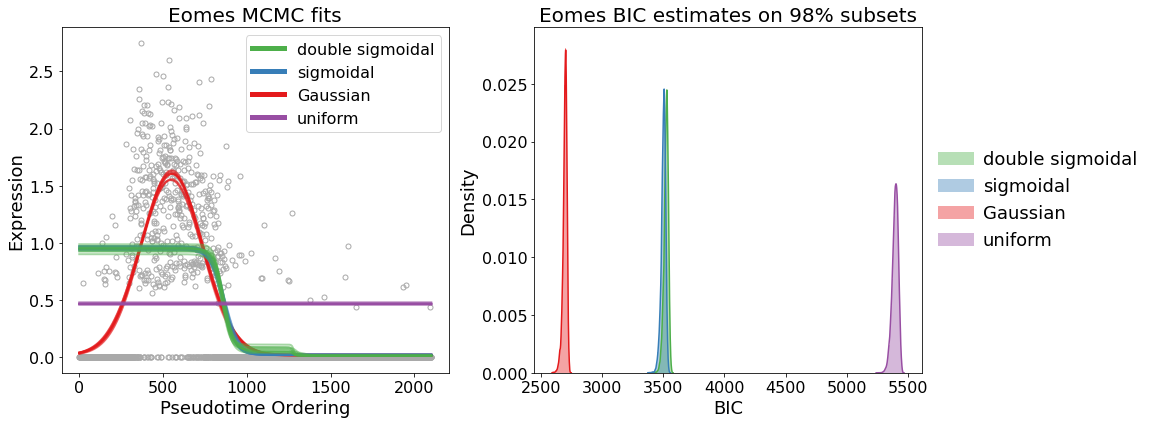

In [8]:
fig = make_joint_fit_and_bic_estimate_plot(mcmc,gene_map['Eomes'],gene_lab='Eomes')

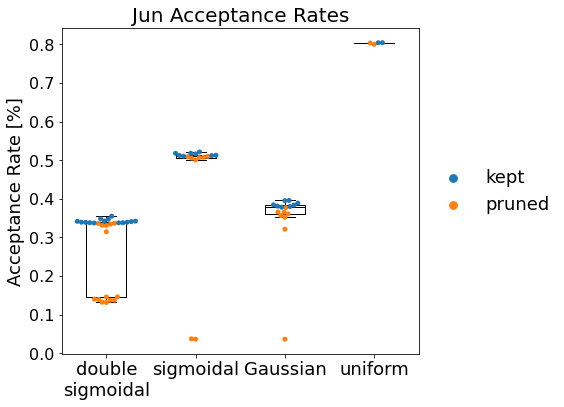

In [9]:
fig = make_acceptance_fraction_plot(mcmc,gene,gene_lab=gene_map_r[gene])

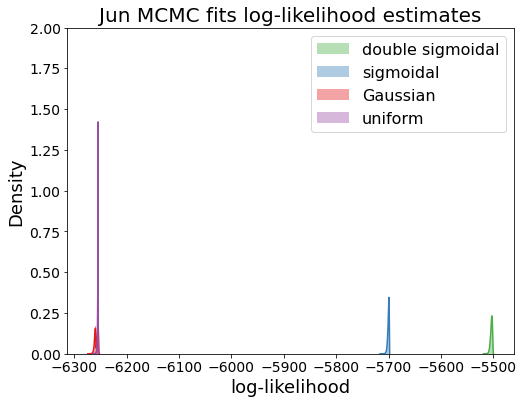

In [10]:
fig = make_lik_hist_plot(mcmc,gene,gene_lab=gene_map_r[gene])

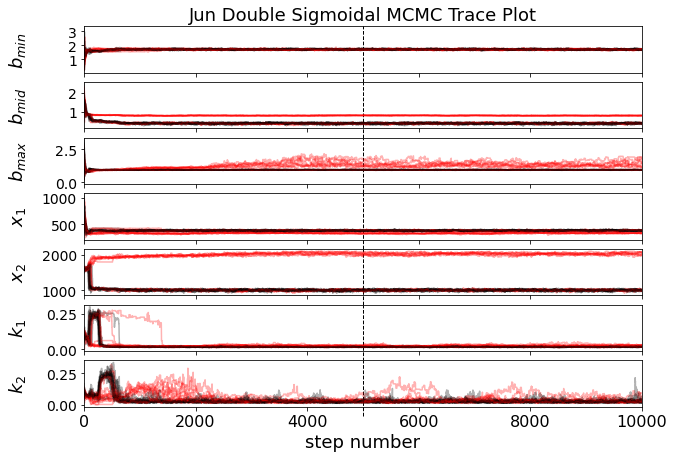

In [11]:
fig = make_mcmc_trace_plot(mcmc,gene,mcmc.best_fits[gene],sub_in_red=True,gene_lab=gene_map_r[gene])

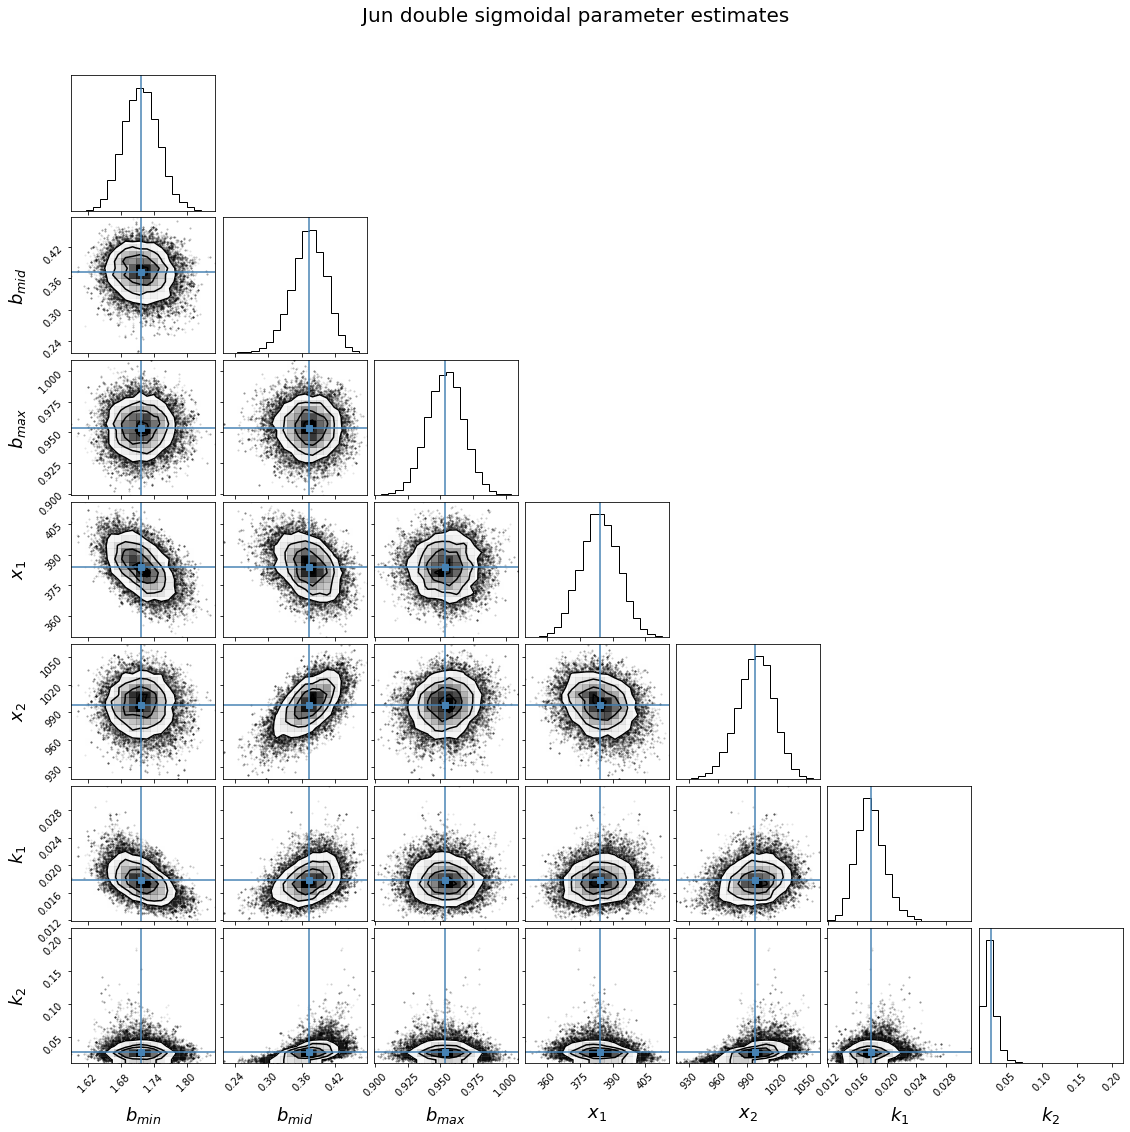

In [12]:
fig = make_corner_plot(mcmc,gene,mcmc.best_fits[gene],n_discard=5000,use_max_args=True,gene_lab=gene_map_r[gene])
plt.show()

In [14]:
#get best fitting genes
mcmc.get_top_genes(n_top=10000,sub_tf=False)

In [15]:
len(mcmc.genes_good_fit)

5

In [16]:
mcmc.genes_good_fit

['ENSMUSG00000027967|Neurog2',
 'ENSMUSG00000032446|Eomes',
 'ENSMUSG00000052684|Jun',
 'ENSMUSG00000027168|Pax6',
 'ENSMUSG00000035033|Tbr1']

Text(0.5, 1.0, 'Transcriptional cascade e14.5 forebrain dorsal NSC $\\rightarrow$ IP $\\rightarrow$ neuron')

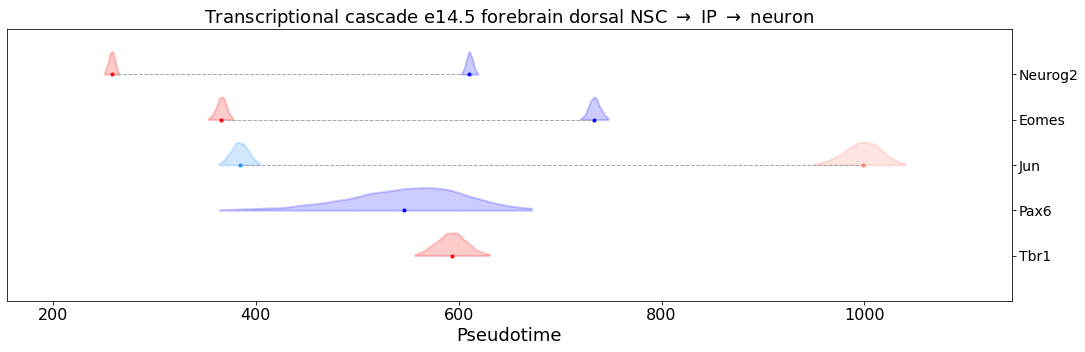

In [17]:
fig = plot_transcriptional_cascade(mcmc,title=None, figsize=(18,5), tfs=mcmc.genes_good_fit, )
ax = plt.gca()
plt.ylim(-len(mcmc.genes_good_fit),1)
plt.title('Transcriptional cascade e14.5 forebrain dorsal NSC '+r'$\rightarrow$'+' IP '+r'$\rightarrow$'+' neuron',fontsize=18)

In [19]:
np.corrcoef(mcmc.expr_dict[gene_map['Eomes']],mcmc.expr_dict[gene_map['Jun']])

array([[ 1.        , -0.14990458],
       [-0.14990458,  1.        ]])

In [20]:
autocorrelations = {}
iter_ = 0
for j,pkl_fn in enumerate(os.listdir(mcmc.pkl_dir)):
    if 'autocorrelation' not in pkl_fn: continue
    iter_ += 1
    gene = pkl_fn.split(".auto")[0]
    if iter_%100 == 0: print(iter_, gene)
    autocorrelations[gene] = pkl.load(open(mcmc.pkl_dir+pkl_fn,'rb'))

In [21]:
len(autocorrelations)

5

In [22]:
autocorrelations[gene].keys()

dict_keys(['acf_params_tot', 'auto_corr_length_int', 'autocorr_time_estimates'])

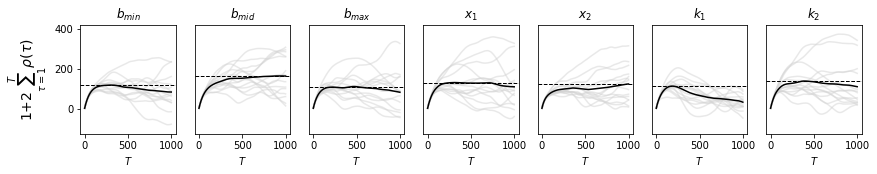

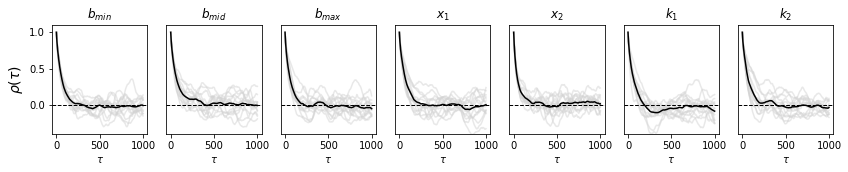

In [26]:
fig = plot_autocorr_time_esimates(mcmc,gene,autocorrelations)
plt.show()
fig = plot_autocorrelation_func(mcmc,gene,autocorrelations)
plt.show()

Inflec 1 overlap:  0.14598571428571427
Inflec 2 overlap:  0.0


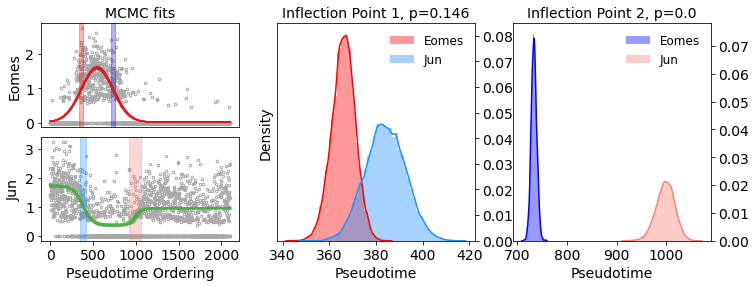

In [29]:
gene1 = gene_map['Eomes']
gene2 = gene_map['Jun']
n_discard=5000

fig = make_inflec_point_comp_plot(mcmc,gene1,gene2,gene_lab1=gene_map_r[gene1],gene_lab2=gene_map_r[gene2])

Inflec 1 overlap:  0.007325


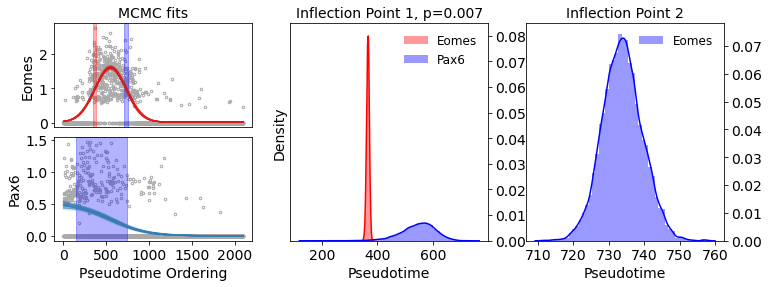

In [31]:
gene1 = gene_map['Eomes']
gene2 = gene_map['Pax6']
n_discard=5000

fig = make_inflec_point_comp_plot(mcmc,gene1,gene2,gene_lab1=gene_map_r[gene1],gene_lab2=gene_map_r[gene2])